In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)

In [2]:
app_train = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/application_train.csv')
# app_test = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/application_test.csv')
# bureau = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/bureau.csv')
# bureau_bal = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/bureau_balance.csv')
# creditcard_bal = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/credit_card_balance.csv')
# installments = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/installments_payments.csv')
# pos_cash = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/POS_CASH_balance.csv')
# prev_app = pd.read_csv('/Users/katieadams/Projects/CreditScorecard/Data/previous_application.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
#calculate null values
app_train.isnull().sum()/len(app_train)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Age analysis

In [5]:
app_train['AGE']=pd.to_timedelta(abs(app_train['DAYS_BIRTH']), unit = 'days')
app_train['AGE']= round((app_train['AGE']/np.timedelta64(1,'Y')))
app_train.drop('DAYS_BIRTH',axis=1,inplace=True)
app_train['AGE'].describe()

count    307511.000000
mean         43.908761
std          11.955775
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

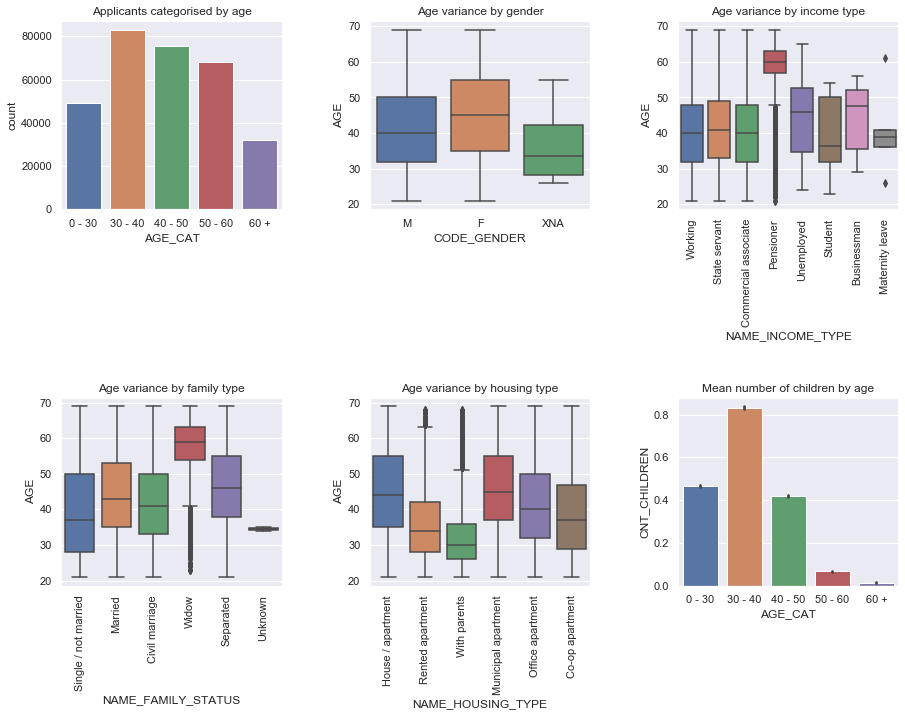

In [6]:
app_train['AGE_CAT']=pd.cut(app_train['AGE'], bins=[0,30,40,50,60,70], labels = ['0 - 30','30 - 40', '40 - 50','50 - 60','60 +'])



fig, axes = plt.subplots(figsize=(15, 8))
ax1 = plt.subplot(231)
ax1 = sns.countplot(x="AGE_CAT", data=app_train)
plt.title('Applicants categorised by age')

ax2 = plt.subplot(232)
ax2 = sns.boxplot(data = app_train, x='CODE_GENDER',y='AGE')
plt.title('Age variance by gender')

ax3 = plt.subplot(233)
ax3 = sns.boxplot(data = app_train, x='NAME_INCOME_TYPE',y='AGE')
for item in ax3.get_xticklabels():
    item.set_rotation(90)
plt.title('Age variance by income type')

ax4 = plt.subplot(234)
ax4 = sns.boxplot(data = app_train, x='NAME_FAMILY_STATUS',y='AGE')
for item in ax4.get_xticklabels():
    item.set_rotation(90)
plt.title('Age variance by family type')

ax5 = plt.subplot(235)
ax5 = sns.boxplot(data = app_train, x='NAME_HOUSING_TYPE',y='AGE')
for item in ax5.get_xticklabels():
    item.set_rotation(90)
plt.title('Age variance by housing type')

ax6 = plt.subplot(236)
ax6 = sns.barplot(x="AGE_CAT", y="CNT_CHILDREN", data=app_train) 
plt.title('Mean number of children by age')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1, wspace=0.4)
plt.show()


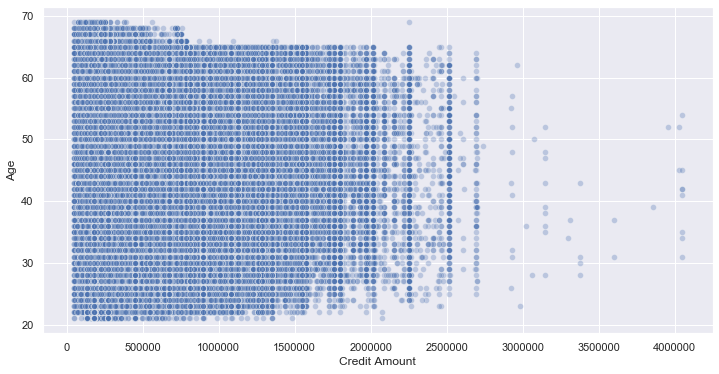

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_CREDIT', y='AGE', data=app_train,alpha=0.3)
plt.xlabel('Credit Amount')
plt.ylabel('Age')
plt.show()

### Income Analysis

In [8]:
#Changing income to thousands

# app_train['AMT_INCOME_TOTAL_original']=app_train['AMT_INCOME_TOTAL'] #backing up the column if needed in future
# app_train['AMT_INCOME_TOTAL']=app_train['AMT_INCOME_TOTAL']/1000
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

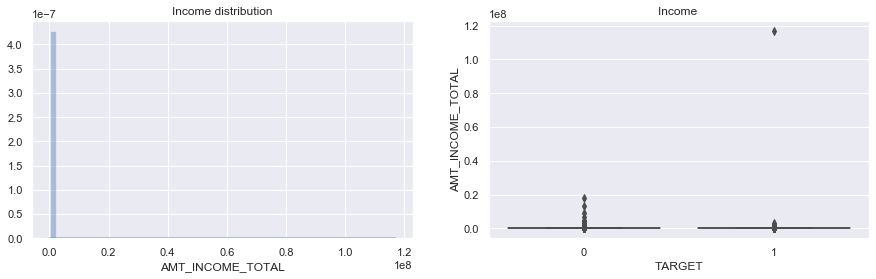

In [9]:
fig, axes = plt.subplots(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1 = sns.distplot(app_train['AMT_INCOME_TOTAL'], hist=True)
plt.title('Income distribution')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(data = app_train, x='TARGET',y='AMT_INCOME_TOTAL')
plt.title('Income ')
plt.show()

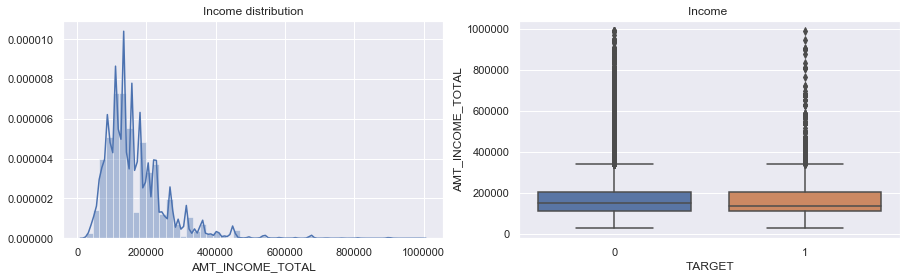

In [10]:
app_train = app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]

fig, axes = plt.subplots(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1 = sns.distplot(app_train['AMT_INCOME_TOTAL'], hist=True)
plt.title('Income distribution')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(data = app_train, x='TARGET',y='AMT_INCOME_TOTAL')
plt.title('Income ')
plt.show()

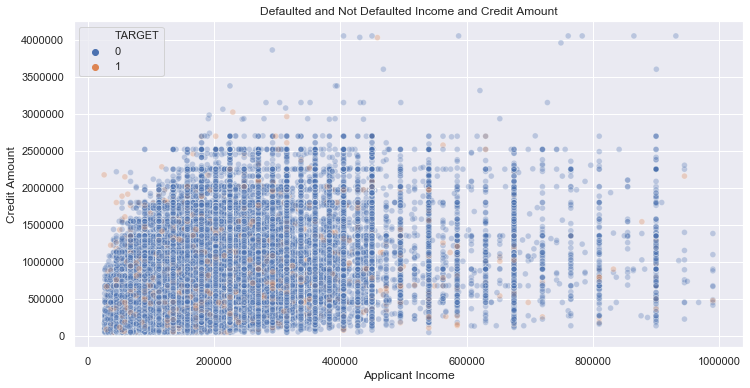

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=app_train, hue='TARGET',alpha=0.3)
plt.xlabel('Applicant Income')
plt.ylabel('Credit Amount')
plt.title('Defaulted and Not Defaulted Income and Credit Amount')
plt.show()

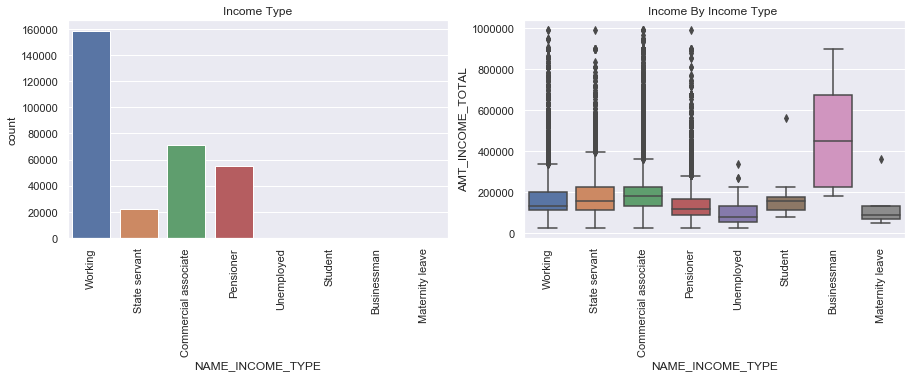

In [12]:
fig, axes = plt.subplots(figsize=(15, 4))
ax1 = plt.subplot(121)
ax1 = sns.countplot(app_train['NAME_INCOME_TYPE'])
for item in ax1.get_xticklabels():
    item.set_rotation(90)
plt.title('Income Type')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(data = app_train, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL')
for item in ax2.get_xticklabels():
    item.set_rotation(90)
plt.title('Income By Income Type ')
plt.show()


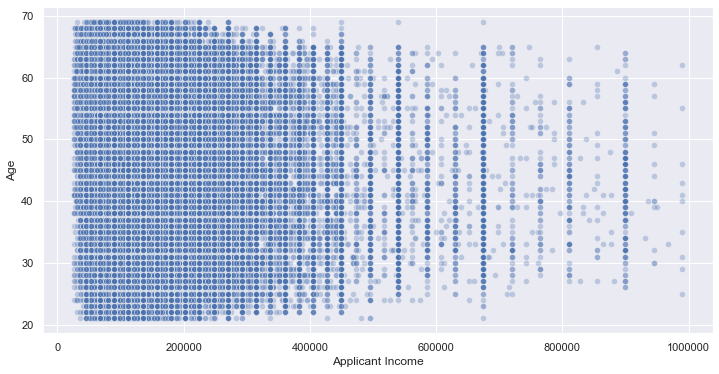

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AGE', data=app_train,alpha=0.3)
plt.xlabel('Applicant Income')
plt.ylabel('Age')
plt.show()

In [14]:
app_train['YEARS_EMPLOYED']=pd.to_timedelta(abs(app_train['DAYS_EMPLOYED']), unit = 'days')
app_train['YEARS_EMPLOYED']= round((app_train['YEARS_EMPLOYED']/np.timedelta64(1,'Y')))
app_train.drop('DAYS_EMPLOYED',axis=1,inplace=True)

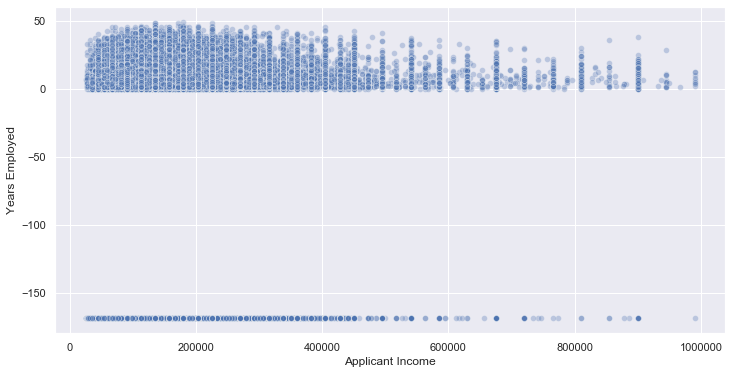

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='YEARS_EMPLOYED', data=app_train,alpha=0.3)
plt.xlabel('Applicant Income')
plt.ylabel('Years Employed')
plt.show()